## Sentiment Analysis On Stocks Data Using Natural Language Processing

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim 
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Tensorflow

import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [3]:
# getting data from csv format
stock_df = pd.read_csv("stock_sentiment.csv")
stock_df

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,Industry body CII said #discoms are likely to ...,0
5787,"#Gold prices slip below Rs 46,000 as #investor...",0
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1


for sentiment column
label = 1 (positive)
label = 0 (negative)

In [4]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [5]:
stock_df.isnull().sum()  # check null values

Text         0
Sentiment    0
dtype: int64

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

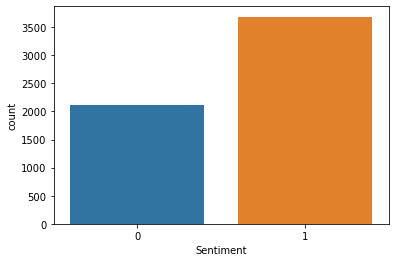

In [6]:
sns.countplot(stock_df["Sentiment"]) # showing number of unique elements in the Sentiment column

In [7]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
test1 = '{# Deep Learning & Machine Learning !!}'
test1_punc_removed = [char for char in test1 if char not in string.punctuation]
test1_punc_removed

[' ',
 'D',
 'e',
 'e',
 'p',
 ' ',
 'L',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 ' ',
 'M',
 'a',
 'c',
 'h',
 'i',
 'n',
 'e',
 ' ',
 'L',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ']

In [9]:
test1_punc_removed_join = ''.join(test1_punc_removed)
test1_punc_removed_join

' Deep Learning  Machine Learning '

In [10]:
# define a function for removing punctuations

def remove_punc(text):
    test_punc_removed = [i for i in text if i not in string.punctuation]
    test_punc_removed_join = "".join(test_punc_removed)
    
    return test_punc_removed_join


In [11]:
# lets remove punctuations from dataset

stock_df["text without punctuation"] = stock_df["Text"].apply(remove_punc)

In [12]:
stock_df.head()

,Text,Sentiment,text without punctuation
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...
3,MNTA Over 12.00,1,MNTA Over 1200
4,OI Over 21.37,1,OI Over 2137


In [13]:
stock_df["Text"][2]

"user I'd be afraid to short AMZN - they are looking like a near-monopoly in eBooks and infrastructure-as-a-service"

In [14]:
stock_df["text without punctuation"][2]

'user Id be afraid to short AMZN  they are looking like a nearmonopoly in eBooks and infrastructureasaservice'

# **PERFORM DATA CLEANING (REMOVE STOPWORDS)**

In [15]:
# dowload stopwords
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ysdmn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
stopwords.words("english")[:10]  # some stopwords in the list

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [17]:
# obtain additional stopwords from nltk library

from nltk.corpus import stopwords
stop_words = stopwords.words("english")
stop_words.extend(["from", "subject","re","edu","use","will","aap","co","day","user","stock","today","week","year"])

In [18]:
stop_words[-10:-1] # last 10 words in the list

['use', 'will', 'aap', 'co', 'day', 'user', 'stock', 'today', 'week']

In [19]:
# Remove stopwords and remove short words (less than 2 characters) in the list
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) >=3 and token not in stop_words:
            result.append(token)
    return result

In [20]:
# adding column for stopwords

stock_df["text without punc & stopwords"] = stock_df["text without punctuation"].apply(preprocess)

In [21]:
stock_df.head()

,Text,Sentiment,text without punctuation,text without punc & stopwords
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,..."
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw..."
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop..."
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta]
4,OI Over 21.37,1,OI Over 2137,[]


In [22]:
stock_df["Text"][0]  # original form

'Kickers on my watchlist XIDE TIT SOQ PNK CPW BPZ AJ  trade method 1 or method 2, see prev posts'

In [23]:
stock_df["text without punctuation"][0] # without punctuation form

'Kickers on my watchlist XIDE TIT SOQ PNK CPW BPZ AJ  trade method 1 or method 2 see prev posts'

In [24]:
stock_df["text without punc & stopwords"][0]  # without punctuation and stopwords form

['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'trade',
 'method',
 'method',
 'see',
 'prev',
 'posts']

In [25]:
# join the words into a string

stock_df["text without punc & stopwords joined"] = stock_df["text without punc & stopwords"].apply(lambda x : " ".join(x))

In [26]:
stock_df.head()

,Text,Sentiment,text without punctuation,text without punc & stopwords,text without punc & stopwords joined
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",kickers watchlist xide tit soq pnk cpw bpz tra...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw...",movie return feageed indicator trades awesome
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop...",afraid short amzn looking like nearmonopoly eb...
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta],mnta
4,OI Over 21.37,1,OI Over 2137,[],


In [27]:
stock_df["text without punc & stopwords"][0]

['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'trade',
 'method',
 'method',
 'see',
 'prev',
 'posts']

In [28]:

stock_df["text without punc & stopwords joined"][0]

'kickers watchlist xide tit soq pnk cpw bpz trade method method see prev posts'

# plotting the word cloud for text with positive sentiment

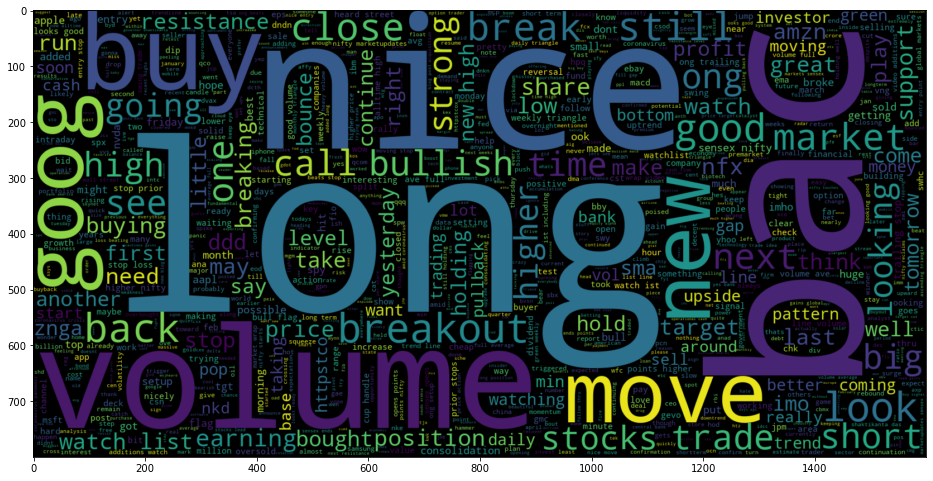

In [29]:
plt.figure(figsize = (16,16)) 
word_cloud = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(stock_df[stock_df['Sentiment'] == 1]["text without punc & stopwords joined"]))
plt.imshow(word_cloud, interpolation = 'bilinear')

# plotting the word cloud for text with negative sentiment

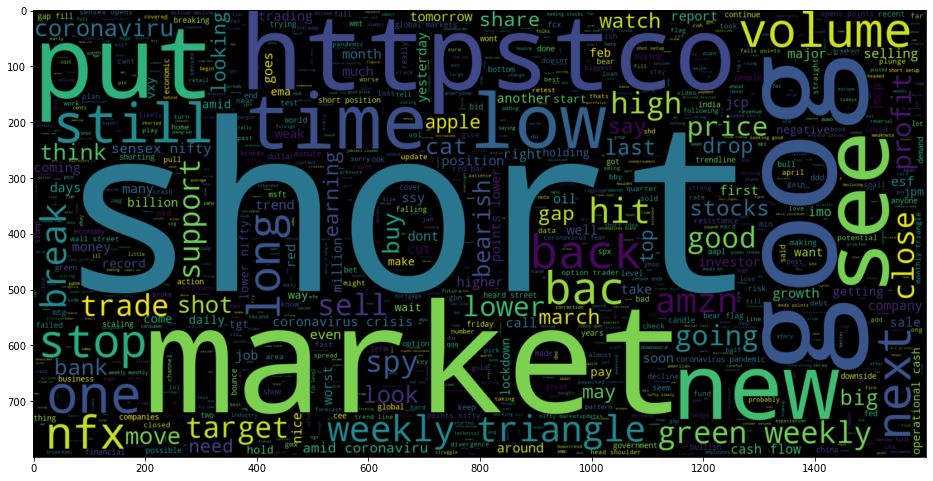

In [30]:
plt.figure(figsize = (16, 16)) 
word_cloud = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(stock_df[stock_df['Sentiment'] == 0]["text without punc & stopwords joined"]))
plt.imshow(word_cloud, interpolation = 'bilinear')

# VISUALIZE CLEANED DATASETS

In [31]:
nltk.download('punkt')  # downloading required package

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ysdmn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
# word_tokenize for breaking up a string into words
print(stock_df["text without punc & stopwords joined"][0])
print("\n-------------------------------------------------------\n")
print(nltk.word_tokenize(stock_df["text without punc & stopwords joined"][0]))

kickers watchlist xide tit soq pnk cpw bpz trade method method see prev posts

-------------------------------------------------------

['kickers', 'watchlist', 'xide', 'tit', 'soq', 'pnk', 'cpw', 'bpz', 'trade', 'method', 'method', 'see', 'prev', 'posts']


In [33]:
# Obtain the maximum length of data for  word embeddings in the next part. 

maxlen = -1

for i in stock_df["text without punc & stopwords joined"]:
    tokens = nltk.word_tokenize(i)
    if(maxlen < len(tokens)):
        maxlen = len(tokens)
        
print("The maximum number of words in any document is", maxlen)

The maximum number of words in any document is 20


In [34]:
tweets_length = [ len(nltk.word_tokenize(x)) for x in stock_df['text without punc & stopwords joined'] ]
tweets_length[:10]

[14, 6, 7, 1, 0, 1, 8, 13, 8, 4]

In [69]:
# Plot the distribution for the number of words in a text using histogram
fig = px.histogram(x = tweets_length, nbins = 25)
fig.show()

In [36]:
stock_df.head()

,Text,Sentiment,text without punctuation,text without punc & stopwords,text without punc & stopwords joined
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",kickers watchlist xide tit soq pnk cpw bpz tra...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw...",movie return feageed indicator trades awesome
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop...",afraid short amzn looking like nearmonopoly eb...
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta],mnta
4,OI Over 21.37,1,OI Over 2137,[],


In [37]:
# Obtain the total words present in the dataset
list_of_words = []

for i in stock_df["text without punc & stopwords"]:
    for j in i:
        list_of_words.append(j)

In [38]:
list_of_words[:10]

['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'trade',
 'method']

In [39]:
len(list_of_words) # total words in the all documents

45099

In [40]:
# Obtaining the total number of unique words
total_words = len(list(set(list_of_words)))
total_words

9268

## Train and Test splitting

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X = stock_df["text without punc & stopwords"]
y = stock_df["Sentiment"]

In [43]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [44]:
X_train.shape

(5211,)

In [45]:
X_test.shape

(580,)

In [46]:
X_train

5586    [world, already, recession, emerging, markets,...
3761    [mtg, still, holding, short, think, see, low, ...
2481    [bac, altho, vol, formation, ideal, still, sau...
3478    [ceg, exactly, want, see, basing, consolidatin...
4838    [mtg, got, little, long, yesterday, like, orde...
                              ...                        
1277              [msft, nice, breakout, earnings, close]
4699    [amk, bear, flag, keep, eye, anyone, intereste...
196     [goog, explodes, aapl, implodes, minte, vid, y...
731             [would, fill, huge, gap, lol, good, luck]
4176                          [cai, bitch, slapand, tank]
Name: text without punc & stopwords, Length: 5211, dtype: object

In [47]:
# Creating a tokenizer to tokenize the words and  sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(X_train)


In [48]:
# Training data
train_sequences = tokenizer.texts_to_sequences(X_train)
train_sequences[:10]

[[326, 405, 647, 1906, 53, 167, 1283, 3647, 3648, 3649],
 [452, 12, 64, 1, 61, 20, 57, 80],
 [10, 3650, 115, 1533, 1534, 12, 2458, 3651, 179, 3652, 72, 406],
 [648, 964, 186, 20, 1284, 703, 6, 44],
 [452, 180, 133, 4, 90, 3, 2459, 3653, 31, 3654],
 [38, 407, 269, 965, 704, 3655, 3656, 116, 1907, 3657, 1535, 1114],
 [50, 2460],
 [7, 1908, 99, 864, 705, 157, 241, 186, 20, 63, 35],
 [2461, 23, 69, 555],
 [346, 2462, 163, 347, 23, 3658, 2463, 17, 168, 453, 101, 90]]

In [49]:
# Testing data
test_sequences = tokenizer.texts_to_sequences(X_test)
test_sequences[:10]

[[40, 3941, 40, 691, 539, 13, 97, 167, 202, 366, 97, 69, 243],
 [39],
 [324, 3217, 1334, 108],
 [1877, 1437, 346, 627, 3015, 23, 52, 12, 36],
 [524, 1835, 124, 1837, 757, 469, 55, 1280, 224, 31, 5408, 1842, 1, 69],
 [133, 2756, 132, 1459],
 [3477, 25, 292, 605, 62, 6, 44, 51, 2722, 1135],
 [783, 4429, 53, 1500, 126, 724, 2041],
 [81, 3, 559, 1, 3, 23, 1006, 2130, 223],
 [48, 1088, 208, 314, 66, 1519, 454, 2903, 1751, 796]]

In [50]:
print("The encoding for document\n", X_train[1:2],"\n is: ", train_sequences[1])

The encoding for document
 3761    [mtg, still, holding, short, think, see, low, ...
Name: text without punc & stopwords, dtype: object 
 is:  [452, 12, 64, 1, 61, 20, 57, 80]


## Adding padding to train and test dataset

In [51]:
padded_train = pad_sequences(train_sequences, maxlen = 20)
padded_train

array([[   0,    0,    0, ..., 3647, 3648, 3649],
       [   0,    0,    0, ...,   20,   57,   80],
       [   0,    0,    0, ..., 3652,   72,  406],
       ...,
       [   0,    0,    0, ...,  317,  526, 8727],
       [   0,    0,    0, ...,  433,    5,  889],
       [   0,    0,    0, ..., 8728, 8729, 1532]])

In [52]:
padded_test = pad_sequences(test_sequences, maxlen = 20)
padded_test

array([[   0,    0,    0, ...,   97,   69,  243],
       [   0,    0,    0, ...,    0,    0,   39],
       [   0,    0,    0, ..., 3217, 1334,  108],
       ...,
       [   0,    0,    0, ...,  521,   36,  978],
       [   0,    0,    0, ...,    0, 1594,   37],
       [   0,    0,    0, ...,  110,  382,   45]])

In [53]:
padded_test.shape, padded_train.shape # the maximum length of data is the same size for all words (24)


((580, 20), (5211, 20))

In [54]:
for i, doc in enumerate(padded_train[:3]):
     print("The padded encoding for document:", i+1," is:", doc)

The padded encoding for document: 1  is: [   0    0    0    0    0    0    0    0    0    0  326  405  647 1906
   53  167 1283 3647 3648 3649]
The padded encoding for document: 2  is: [  0   0   0   0   0   0   0   0   0   0   0   0 452  12  64   1  61  20
  57  80]
The padded encoding for document: 3  is: [   0    0    0    0    0    0    0    0   10 3650  115 1533 1534   12
 2458 3651  179 3652   72  406]


In [55]:
# Convert the data to categorical 2D representation

y_train_cat = to_categorical(y_train, 2)
y_test_cat = to_categorical(y_test, 2)

In [56]:
y_train_cat

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [57]:
y_train_cat

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [58]:
y_test_cat.shape

(580, 2)

In [59]:
y_train_cat

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

## Creating Sequential Model

In [60]:
# Sequential Model
model = Sequential()

# embedding layer
model.add(Embedding(total_words, output_dim = 512))

# Bi-Directional RNN and LSTM
model.add(LSTM(256))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 512)         4745216   
_________________________________________________________________
lstm (LSTM)                  (None, 256)               787456    
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 5,565,826
Trainable params: 5,565,826
Non-trainable params: 0
_________________________________________________________________


In [61]:
# train the model
model.fit(padded_train, y_train_cat, batch_size = 32, validation_split = 0.2, epochs = 2)

Epoch 1/2
131/131 [==============================] - 16s 119ms/step - loss: 0.5513 - acc: 0.7186 - val_loss: 0.5335 - val_acc: 0.7354
Epoch 2/2
131/131 [==============================] - 15s 114ms/step - loss: 0.2625 - acc: 0.8952 - val_loss: 0.5501 - val_acc: 0.7469


## Making Prediction

In [62]:
pred = model.predict(padded_test)

In [63]:

prediction = []
for i in pred:
    prediction.append(np.argmax(i))

In [64]:
prediction[:20]

[0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1]

In [65]:
# list containing original values
original = []
for i in y_test_cat:
    original.append(np.argmax(i))

In [66]:
original[:20]

[1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1]

In [67]:
# acuracy score on text data
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(original, prediction)
accuracy

0.7517241379310344

## Plotting the confusion matrix

<AxesSubplot:>

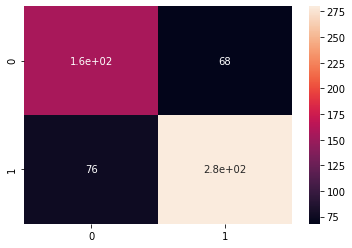

In [68]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(original, prediction)
sns.heatmap(c_matrix, annot = True)